<a href="https://colab.research.google.com/github/BuberDev/Machine_Learning/blob/main/DeepLearning(PyTorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making prediction and evaluating a model (interference)",
                      5: "saving and loading a model",
                      6: "putting it and together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making prediction and evaluating a model (interference)',
 5: 'saving and loading a model',
 6: 'putting it and together'}

In [44]:
import torch 
from torch import nn # Contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__ 

'1.13.1+cu116'

## 1. Data (preparing and loading)

Data can be almost everything... in ML
- Excel speadsheet
- images of any kind
- videos (YouTube has a lot of data)
- Audio llike songs or podcasts
- DNA
- Text

Machine Learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this. let's create some known data using the linear regression formula.
We'll use a linear regression formula to make a straight line with *known* ***parameters***

In [45]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create a model that will estimate those values above (because we know them already) 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias # Linear Regression formula

X[:10], y[:10], len(X), len(y)



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]), 50, 50)

### Spliting data into training and test sets (one of the most important conceepts in ML)

In [46]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
# X_train, y_train
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?
This is where the data experts motto comes in!
"Visualize, visualize, visualize!"

In [47]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plots traning data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue 
  plt.scatter(train_data, train_labels, c="b", s=4, label="Traning data")

  # Plot test data in green 
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")

  # Are there predictions? Chec if they are predictions
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  
  # Show the legend
  plt.legend(prop={"size": 14})

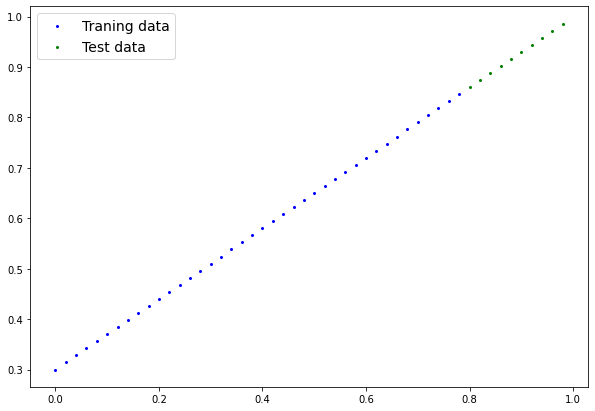

In [48]:
plot_prediction()

## 2. Build model
Our first PyTorch model!
What our model does:
- Start with random values (weights & bias)
- Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it so?
Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [49]:
from torch import nn
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- Almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, # <- start with random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float)) # <- PyTorch loves the datatype torch.float32
    self.bias = nn.Parameter(torch.randn(1, # <- start with random bias and try to adjust it to the ideal weight
                                         requires_grad=True,# <- can this parameter be updated via gradient descent?
                                         dtype=torch.float))# <- PyTorch loves the datatype torch.float32
    

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weight * x + self.bias # This is the Linear Regression formula



### PyTorch model building essentials
* torch.nn - Contains all of the buildings for computational graphs ( a neural networs)
* torch.nn.Parameter - what parameters should our model try and learn, oftrn a PyTorch layer from torch.nn will set these for us 
* torch.nn.Module - The base class for all neural network modules, if you subclass it,   you should overide forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Chcecking the contents of our PyTorch model
Now we've created a model, let's see what's inside...
So we can check our model parameters or what is inside our model using `.parameters()`

In [50]:
from torch import nn
## Create random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Create out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

### Making predicting using `torch.inference_mode()`
To check our model's predictive power, let's see how well it predicts `y_test`based on `x_test`
When we pass data through our model, it's going to run it through the `forward()`method 


In [51]:
# Make prediction with model
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [52]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

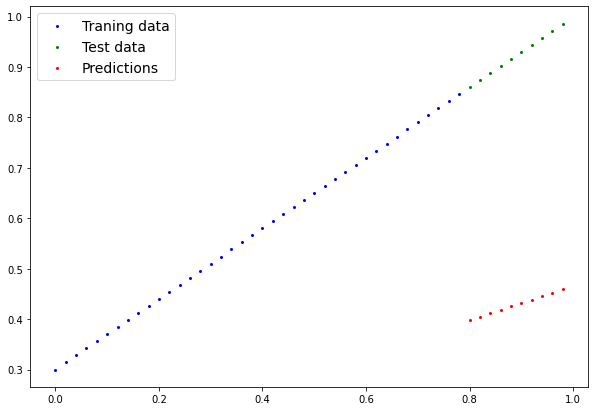

In [53]:
plot_prediction(predictions=y_preds)

## 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters (thesecmay be random) to some *known* parameters.

Or in other words from a poor represenntation of the data to a better representation of the data

One way to measure how poor or how wrong your models predictions are, is to use a loss function
* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function

Things we need to train:
* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better
* **Optimizer:** Takes into account the loss of model and adjusts the model's parameters(e.g. weight & bias) to improve the loss function

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [55]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [56]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [57]:
# Setup a loss function
loss_fn = nn.L1Loss

# Setup optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.001) # lr = learning rate = possibly the most important hyperparameter you can set 

torch.nn.modules.loss.L1Loss